In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# allow plots to appear in the notebook
%matplotlib inline

#Importing all of the files
S_2=pd.read_csv('~/Desktop/data_science/epl_2002.csv', error_bad_lines=False)
S_3=pd.read_csv('~/Desktop/data_science/epl_2003.csv', error_bad_lines=False)
S_4=pd.read_csv('~/Desktop/data_science/epl_2004.csv', error_bad_lines=False)
S_5=pd.read_csv('~/Desktop/data_science/epl_2005.csv', error_bad_lines=False)
S_6=pd.read_csv('~/Desktop/data_science/epl_2006.csv', error_bad_lines=False)
S_7=pd.read_csv('~/Desktop/data_science/epl_2007.csv', error_bad_lines=False)
S_8=pd.read_csv('~/Desktop/data_science/epl_2008.csv', error_bad_lines=False)
S_9=pd.read_csv('~/Desktop/data_science/epl_2009.csv', error_bad_lines=False)
S_10=pd.read_csv('~/Desktop/data_science/epl_2010.csv', error_bad_lines=False)
S_11=pd.read_csv('~/Desktop/data_science/epl_2011.csv', error_bad_lines=False)
S_12=pd.read_csv('~/Desktop/data_science/epl_2012.csv', error_bad_lines=False)
S_13=pd.read_csv('~/Desktop/data_science/epl_2013.csv', error_bad_lines=False)
S_14=pd.read_csv('~/Desktop/data_science/epl_2014.csv', error_bad_lines=False)
S_15=pd.read_csv('~/Desktop/data_science/epl_2015.csv', error_bad_lines=False)
S_16=pd .read_csv('~/Desktop/data_science/epl_2016.csv', error_bad_lines=False)
S_17=pd.read_csv('~/Desktop/data_science/epl_2017.csv', error_bad_lines=False)

Skipping line 257: expected 48 fields, saw 49
Skipping line 258: expected 48 fields, saw 49
Skipping line 259: expected 48 fields, saw 49
Skipping line 260: expected 48 fields, saw 49
Skipping line 261: expected 48 fields, saw 49
Skipping line 262: expected 48 fields, saw 49
Skipping line 263: expected 48 fields, saw 49
Skipping line 264: expected 48 fields, saw 49
Skipping line 265: expected 48 fields, saw 49
Skipping line 266: expected 48 fields, saw 49
Skipping line 267: expected 48 fields, saw 49
Skipping line 268: expected 48 fields, saw 49
Skipping line 269: expected 48 fields, saw 49
Skipping line 270: expected 48 fields, saw 49
Skipping line 271: expected 48 fields, saw 49
Skipping line 272: expected 48 fields, saw 49
Skipping line 273: expected 48 fields, saw 51
Skipping line 274: expected 48 fields, saw 51
Skipping line 275: expected 48 fields, saw 51
Skipping line 276: expected 48 fields, saw 51
Skipping line 277: expected 48 fields, saw 51
Skipping line 278: expected 48 fie

In [2]:
#This allows us to merge the data together into 1 data source-- see that we are working with 5927 games

data_names=[S_2,S_3,S_4,S_5,S_6,S_7,S_8,S_9,S_10,S_11,S_12,S_13,S_14,S_15,S_16,S_17]

merged_data=pd.concat(data_names,ignore_index=True,join='inner')

merged_data.dtypes




len(merged_data)

            
            





5927

In [3]:
#This cell adds what the Sports books picks were and whether or not it was an upset (not the same as what the sport books predicted)
#WARNING THIS CELL TAKES FOREVER TO RUN
test_data=merged_data
test_data['pick']=str
test_data['upset']=int


ft_col=['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HF','AF','HY','AY','pick','upset','B365H','B365D','B365A']
test_data_ft=test_data[ft_col]

##Initial data cleaning and addition of columns-- this function adds both what Bet 365 picked for the game (with the lowest odds) and whether the actual result matched that

def odds_pick(data):
    for i in range(0,len(data)):
            min_odds=min(data.B365H[i],data.B365A[i],data.B365D[i])
            if min_odds==data.B365H.loc[i]:
                data['pick'][i]='H'
            elif min_odds==data.B365A.loc[i]:
                data['pick'][i]='A'
            else:
                data['pick'][i]='D'
            if data.pick.loc[i]==data.FTR.loc[i]:
                data['upset'][i]=0
            else:
                data['upset'][i]=1           

odds_pick(test_data_ft)




C:\Users\583185\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\583185\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\583185\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\583185\AppData\Local\Continuum\Anacon

In [4]:
##Testing the value of being at home... if the winning team was at home=2, if home team draw=1 if lost=0

test_data_ft['home'] = pd.factorize(test_data_ft['FTR'],sort=['A','D','H'])[0]
#Making sure everything lines up
print(test_data_ft[['FTR','home']])

     FTR  home
0      D     1
1      A     0
2      D     1
3      H     2
4      H     2
5      H     2
6      D     1
7      H     2
8      A     0
9      H     2
10     D     1
11     A     0
12     A     0
13     H     2
14     H     2
15     D     1
16     A     0
17     H     2
18     A     0
19     D     1
20     H     2
21     A     0
22     H     2
23     D     1
24     D     1
25     A     0
26     D     1
27     H     2
28     H     2
29     H     2
...   ..   ...
5897   H     2
5898   H     2
5899   D     1
5900   H     2
5901   A     0
5902   H     2
5903   A     0
5904   H     2
5905   H     2
5906   A     0
5907   A     0
5908   A     0
5909   H     2
5910   H     2
5911   A     0
5912   H     2
5913   H     2
5914   H     2
5915   D     1
5916   A     0
5917   H     2
5918   A     0
5919   H     2
5920   A     0
5921   D     1
5922   H     2
5923   H     2
5924   A     0
5925   H     2
5926   A     0

[5927 rows x 2 columns]


C:\Users\583185\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#Make sure it didn't return any null values and checking object types

print(pd.isnull(test_data_ft).sum())
print(test_data_ft.dtypes)

#Ah man we got 1  row that doesn't work

Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
FTR         1
HS          1
AS          1
HST         1
AST         1
HF          1
AF          1
HY          1
AY          1
pick        0
upset       0
B365H       1
B365D       1
B365A       1
home        0
dtype: int64
Date         object
HomeTeam     object
AwayTeam     object
FTHG        float64
FTAG        float64
FTR          object
HS          float64
AS          float64
HST         float64
AST         float64
HF          float64
AF          float64
HY          float64
AY          float64
pick         object
upset        object
B365H       float64
B365D       float64
B365A       float64
home          int64
dtype: object


In [12]:
#Getting rid of that 1 null value
test_data_ft_noNA=test_data_ft.dropna()

print(len(test_data_ft_noNA))

#yep 1 shorter


test_data_ft=test_data_ft_noNA



5926


In [56]:
##Creating some other fields which will be useful for comparing games to one another
test_data_ft['total_shots']=test_data_ft.HS+test_data_ft.AS
test_data_ft['total_shots_on_target']=test_data_ft.HST+test_data_ft.AST
test_data_ft['total_goals']=test_data_ft.FTHG+test_data_ft.FTAG
test_data_ft['total_fouls']=test_data_ft.HF+test_data_ft.AF
test_data_ft['total_yellow']=test_data_ft.HY+test_data_ft.AY


print(test_data_ft.dtypes)
#returns some objects that mess things up later so let's change them up

test_data_ft['upset']=test_data_ft['upset'].astype(str).astype(int)
test_data_ft['home']=test_data_ft['home'].astype(str).astype(int)

print(test_data_ft.dtypes)


Date                      object
HomeTeam                  object
AwayTeam                  object
FTHG                     float64
FTAG                     float64
FTR                       object
HS                       float64
AS                       float64
HST                      float64
AST                      float64
HF                       float64
AF                       float64
HY                       float64
AY                       float64
pick                      object
upset                      int32
B365H                    float64
B365D                    float64
B365A                    float64
home                       int32
total_shots              float64
total_shots_on_target    float64
total_goals              float64
total_fouls              float64
total_yellow             float64
dtype: object
Date                      object
HomeTeam                  object
AwayTeam                  object
FTHG                     float64
FTAG                     floa

                          upset      home  total_shots  total_shots_on_target  \
upset                  1.000000 -0.388659    -0.037030              -0.084261   
home                  -0.388659  1.000000    -0.015887               0.025178   
total_shots           -0.037030 -0.015887     1.000000               0.558574   
total_shots_on_target -0.084261  0.025178     0.558574               1.000000   
total_fouls            0.090721 -0.003695    -0.170771              -0.044750   
total_yellow           0.091919 -0.056069    -0.042895              -0.063091   
total_goals           -0.208178  0.059242     0.207810               0.335494   

                       total_fouls  total_yellow  total_goals  
upset                     0.090721      0.091919    -0.208178  
home                     -0.003695     -0.056069     0.059242  
total_shots              -0.170771     -0.042895     0.207810  
total_shots_on_target    -0.044750     -0.063091     0.335494  
total_fouls               1.000

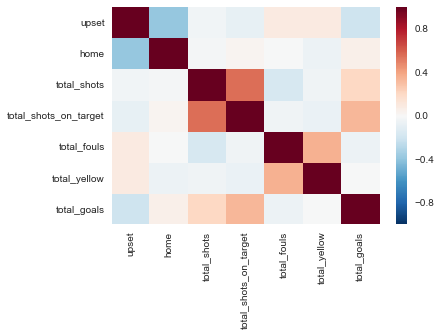

In [63]:
#Figuring out what's related

#Break down our data further so we can do some correlations
numerical_cols=['upset','home','total_shots','total_shots_on_target','total_fouls','total_yellow','total_goals']
numerical_data=test_data_ft[numerical_cols]

num_cor=numerical_data.corr()

print(num_cor)
print(sns.heatmap(num_cor))

#This info isn't super helpful (since we would assume that shots are correlated with shots on target already) so let's make a pivot table and look at averages by result



Axes(0.125,0.125;0.62x0.755)


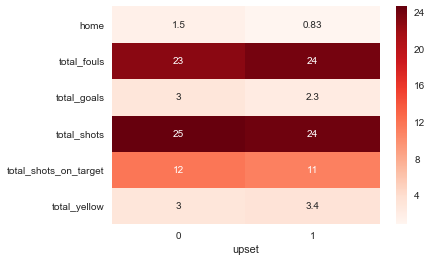

In [62]:
#Making the pivot table

ft_pt=['total_shots','total_shots_on_target','total_fouls','total_yellow','total_goals']

piv=pd.pivot_table(numerical_data,columns=['upset'])
p=pd.pivot_table(numerical_data,columns=["home"])



print(sns.heatmap(piv,annot=True,cmap='Reds'))


#so initial hypthosis--- more defensively minded games (lots of fouls and yellows, lead to more upsets)

In [30]:
#First model-- using logistic regression for classification with all of our factors
from sklearn import linear_model, model_selection
from sklearn.linear_model import LogisticRegression
lr_1=LogisticRegression()

ft_model=['home','total_shots','total_shots_on_target','total_fouls','total_yellow','total_goals']

X_df=test_data_ft[ft_model]

y_df=test_data_ft['upset']

X=np.array(test_data_ft[ft_model])
y=np.array(test_data_ft['upset'])


X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,random_state=8)

log1=linear_model.LogisticRegression(C=1e9).fit(X_train,y_train)


print(log1.score(X_test,y_test))

y_df.value_counts()


y_pred_class=log1.predict(X)
y_pre_proba=log1.predict_proba(X)

0.732793522267


In [64]:
#How are our factors weighed in the model?

pd.DataFrame(zip(X_df.columns, np.transpose(log1.coef_)))

,0,1
0,home,[-0.973387412733]
1,total_shots,[0.00502548593475]
2,total_shots_on_target,[-0.0142986387496]
3,total_fouls,[0.0280761359771]
4,total_yellow,[0.0482805802643]
5,total_goals,[-0.258363083662]


In [65]:
#Scoring the model on cross validation
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(log1, X_test, y_test, cv=10)
print(cross_val_scores.mean())

0.737540858898


In [66]:
##How about a comparison of logistic models? Offensive vs defensive? Psychological vs other things

ofensive_cats=['total_shots','total_shots_on_target','total_goals']
X_offensive_df=test_data_ft[ofensive_cats]
y_offensive_df=test_data_ft['upset']

X_offensive=np.array(X_offensive_df)
y_offensive=np.array(y_offensive_df)

X_train_O,X_test_O,y_train_O,y_test_O=model_selection.train_test_split(X_offensive,y_offensive,random_state=8)


lr_offensive=linear_model.LogisticRegression(C=1e9).fit(X_train_O,y_train_O)

print lr_offensive.score(X_test_O,y_test_O)



defensive_cats=['total_fouls','total_yellow','home']
X_defensive=np.array(test_data_ft[defensive_cats])
y_defensive=np.array(test_data_ft['upset'])

X_train_D,X_test_D,y_train_D,y_test_D=model_selection.train_test_split(X_defensive,y_defensive,random_state=8)

lr_defensive=linear_model.LogisticRegression(C=1e9).fit(X_train_D,y_train_D)

print lr_defensive.score(X_test_D,y_test_D)



0.587719298246
0.7004048583


In [67]:
#How many neighbors should we pick?

scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

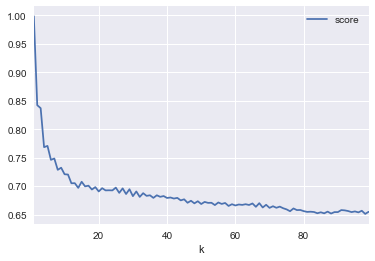

In [52]:
#Ploting that ish
plot_data = pd.DataFrame(scores,columns=['k','score'])
plot_data.plot.line(x='k',y='score');

In [37]:
##Okay how about a KNN model?

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn_1 = KNeighborsClassifier(n_neighbors=18)
knn_1.fit(X_train, y_train)

y_pred_class = knn_1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))


0.644399460189


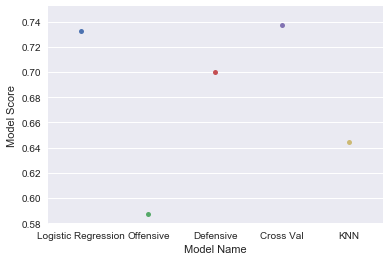

In [40]:
###Difference in model scores

models_score=[log1.score(X_test,y_test),lr_offensive.score(X_test_O,y_test_O),lr_defensive.score(X_test_D,y_test_D),cross_val_scores.mean(),metrics.accuracy_score(y_test, y_pred_class)]
models_name=['Logistic Regression','Offensive','Defensive','Cross Val','KNN']


scores_df=pd.DataFrame({'Model Score':models_score,'Model Name':models_name})

sns.stripplot(x="Model Name", y="Model Score", data=scores_df)

True     1086
False     396
Name: Correct, dtype: int64


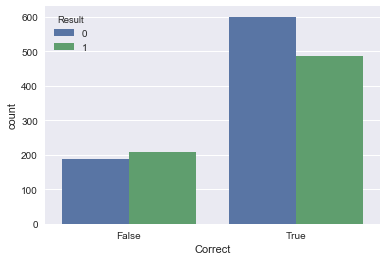

In [47]:
#How well did the the logistic regression do on our training set?

predictions=log1.predict(X_test)
game_num=range(0,len(predictions))
actual=y_test
correct=(predictions==actual)

predictions_df=pd.DataFrame({'Game Number':game_num,'Predicted':predictions,'Result':actual,'Correct':correct})
#Counting number of correct predictions, stratifyed by the actual result... did better on predicting non-upsets
sns.countplot(x="Correct",data=predictions_df, hue='Result')
print(predictions_df.Correct.value_counts())

In [48]:
#For Comparison how did the sport books do?

print 'number of upsets in ', len(test_data_ft), 'matches', 'is', (test_data_ft.upset.sum())

print (float(test_data_ft.upset.sum())/(float(len(test_data_ft)))) #percentage of games that bookies got right

number of upsets in  5926 matches is 2754
0.464731690854
